# Access Spark by notebook
## referring:
https://blog.sicara.com/get-started-pyspark-jupyter-guide-tutorial-ae2fe84f594f  
https://docs.docker.com/engine/installation/linux/docker-ce/debian/#install-using-the-convenience-script  
https://blog.alexellis.io/getting-started-with-docker-on-raspberry-pi/  
https://hub.docker.com/r/jupyter/all-spark-notebook/  

## install docker on raspberry:
```shell
curl -fsSL get.docker.com -o get-docker.sh
sudo sh get-docker.sh
sudo systemctl enable docker
#reboot Pi
sudo systemctl start docker
sudo usermod -aG docker pi
#verify:
docker run hello-world
```

## Install "all-spark-notebook" image
```shell
docker pull jupyter/all-spark-notebook
docker run -it --rm -p 8888:8888 jupyter/all-spark-notebook
standard_init_linux.go:195: exec user process caused "exec format error"
```
**This image is not support raspberry**

## Install miniconda enviroment:
referring https://stackoverflow.com/questions/39371772/how-to-install-anaconda-on-raspberry-pi-3-model-b
```shell
wget http://repo.continuum.io/miniconda/Miniconda3-latest-Linux-armv7l.sh
sudo /bin/bash Miniconda3-latest-Linux-armv7l.sh
# When installing change the default dir installation from /root/miniconda3 to:
# /home/pi/miniconda3
sudo nano /etc/profile
#prepend this : export PATH="/home/pi/miniconda3/bin:"
sudo ln -sf /etc/profile /root/.bashrc
sudo ln -sf /etc/profile /home/pi/.bashrc
source /etc/profile
pi@raspberrypi2:~$ conda install jupyter 
Fetching package metadata: ....
Error: No packages found in current linux-armv7l channels matching: jupyter
```
**Jupyter can't be installed on Raspberry Pi**

## Install sparkmagic and livy
referring https://github.com/jupyter-incubator/sparkmagic
```shell
conda install sparkmagic
jupyter nbextension enable --py --sys-prefix widgetsnbextension 
jupyter serverextension enable --py sparkmagic
```
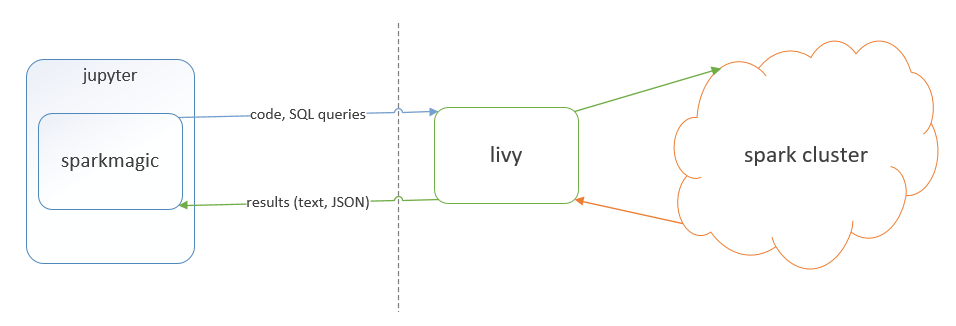
start Livy:  
```shell
sudo su
mkdir -p /opt/livy/livy-0.4.0-incubating-bin/logs
cd /opt/livy/livy-0.4.0-incubating-bin/bin
./livy-server
```
referring https://livy.incubator.apache.org/get-started/  
Livy UI on:http://raspberrypi1:8998/ui  



##  Test
referring : https://github.com/jupyter-incubator/sparkmagic/blob/master/examples/Magics%20in%20IPython%20Kernel.ipynb

In [1]:
%load_ext sparkmagic.magics

In [2]:
%manage_spark

Added endpoint http://raspberrypi1:8998/
Starting Spark application


ID,YARN Application ID,Kind,State,Spark UI,Driver log,Current session?
0,None,pyspark,idle,,,✔


SparkSession available as 'spark'.


In [5]:
%spark?

In [7]:
%%spark
numbers = sc.parallelize([1, 2, 3, 4])
print('First element of numbers is {} and its description is:\n{}'.format(numbers.first(), numbers.toDebugString()))

First element of numbers is 1 and its description is:
(1) ParallelCollectionRDD[0] at parallelize at PythonRDD.scala:480 []

In [8]:
%spark logs

stdout: 

stderr: 
17/11/28 20:26:02 INFO driver.RSCDriver: Connecting to: 192.168.1.108:10000
17/11/28 20:26:02 INFO driver.RSCDriver: Starting RPC server...
17/11/28 20:26:04 INFO rpc.RpcServer: Connected to the port 10001
17/11/28 20:26:04 WARN rsc.RSCConf: Your hostname, raspberrypi1, resolves to a loopback address; using 192.168.1.108  instead (on interface wlan0)
17/11/28 20:26:04 WARN rsc.RSCConf: Set 'livy.rsc.rpc.server.address' if you need to bind to another address.
17/11/28 20:26:06 INFO driver.RSCDriver: Received job request e2cff957-f4e1-4f88-942f-298f54d9164f
17/11/28 20:26:06 INFO driver.RSCDriver: SparkContext not yet up, queueing job request.
17/11/28 20:26:07 INFO spark.SparkContext: Running Spark version 2.2.0
17/11/28 20:26:09 WARN util.NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
17/11/28 20:26:10 WARN util.Utils: Your hostname, raspberrypi1 resolves to a loopback address: 127.0.1.1; using 

In [9]:
%%spark -c sql
SHOW TABLES

""


In [10]:
%%spark -c sql -o df_hvac --maxrows 10
SELECT * FROM hivesampletable

An error was encountered:
u'Table or view not found: hivesampletable; line 1 pos 14'
Traceback (most recent call last):
  File "/opt/spark/python/lib/pyspark.zip/pyspark/sql/session.py", line 556, in sql
    return DataFrame(self._jsparkSession.sql(sqlQuery), self._wrapped)
  File "/opt/spark/python/lib/py4j-0.10.4-src.zip/py4j/java_gateway.py", line 1133, in __call__
    answer, self.gateway_client, self.target_id, self.name)
  File "/opt/spark/python/lib/pyspark.zip/pyspark/sql/utils.py", line 69, in deco
    raise AnalysisException(s.split(': ', 1)[1], stackTrace)
AnalysisException: u'Table or view not found: hivesampletable; line 1 pos 14'



In [ ]:
df_hvac.head()

In [1]:
%load_ext sparkmagic.magics
%manage_spark

Added endpoint http://raspberrypi1:8998/ui


HttpClientException: Invalid status code '200' from http://raspberrypi1:8998/ui/sessions with error payload: <html>
      <head>
      <link rel="stylesheet" href="/static/css/bootstrap.min.css" type="text/css"/>
      <link rel="stylesheet" href="/static/css/dataTables.bootstrap.min.css" type="text/css"/>
      <link rel="stylesheet" href="/static/css/livy-ui.css" type="text/css"/>
      <script src="/static/js/jquery-3.2.1.min.js"></script>
      <script src="/static/js/bootstrap.min.js"></script>
      <script src="/static/js/jquery.dataTables.min.js"></script>
      <script src="/static/js/dataTables.bootstrap.min.js"></script>
      <script src="/static/js/livy-ui.js"></script>
      <title>Livy - 404</title>
    </head>
      <body>
        <div class="container-fluid">
          <nav class="navbar navbar-default">
      <div class="container-fluid">
        <div class="navbar-header">
          <a class="navbar-brand" href="/ui">
            <img alt="Livy" src="/static/img/livy-mini-logo.png"/>
          </a>
        </div>
        <div class="collapse navbar-collapse">
          <ul class="nav navbar-nav">
            
          </ul>
        </div>
      </div>
    </nav>
          <h3>404 No Such Page</h3>
        </div>
      </body>
    </html>

Added endpoint http://raspberrypi1:8998
Starting Spark application


ID,YARN Application ID,Kind,State,Spark UI,Driver log,Current session?
1,None,spark,idle,,,✔


SparkSession available as 'spark'.


In [2]:
%%spark -s test_scala
val hvacText = sc.parallelize(Array(1, 2, 3, 4))
hvacText.first()

res1: Int = 1

In [8]:
%%spark -s test_scala -c sql -o my_df_from_scala --maxrows 10
show tables

""
